In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv("./asm_data_for_ml.txt", sep='\t')

In [155]:
def mask(cola, colb, color=None, p1=99.9, p2=99.9):
    mask = (cola < np.percentile(cola, p1)) & (colb < np.percentile(colb, p2))
    if color is None:
        return cola[mask], colb[mask], None
    else:
        return cola[mask], colb[mask], color[mask]

    

def myhexplot(cola, colb, p1=99.9, p2=99.9):
    plt.figure()
    cola, colb, _ = mask(cola, colb, p1=p1, p2=p2)
    plt.hexbin(cola, colb, cmap='viridis', bins='log')
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)
    
def myscatterplot(cola, colb, color=None, p1=99.9, p2=99.9, alpha=1):
    plt.figure()
    cola, colb, color = mask(cola, colb, color, p1=p1, p2=p2)
    plt.scatter(cola, colb, cmap='viridis', c=color, alpha=alpha)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)

<IPython.core.display.Javascript object>


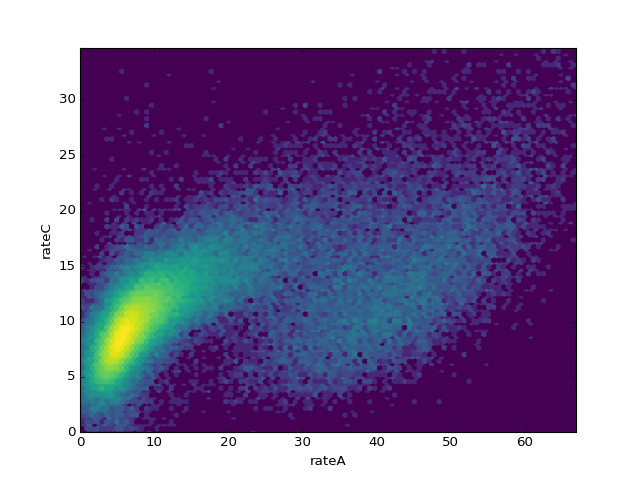

In [149]:
myhexplot(data.rateA, data.rateC)

<IPython.core.display.Javascript object>


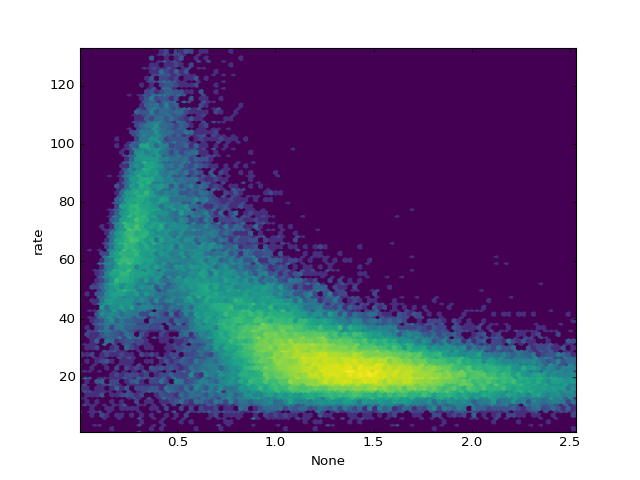

In [144]:
myhexplot(data.rateC / data.rateA, data.rate, p1=95)

<IPython.core.display.Javascript object>


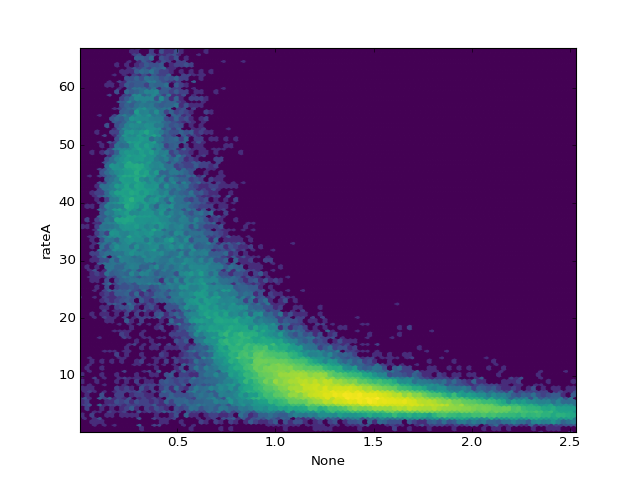

In [150]:
myhexplot(data.rateC / data.rateA, data.rateA, p1=95)

<IPython.core.display.Javascript object>


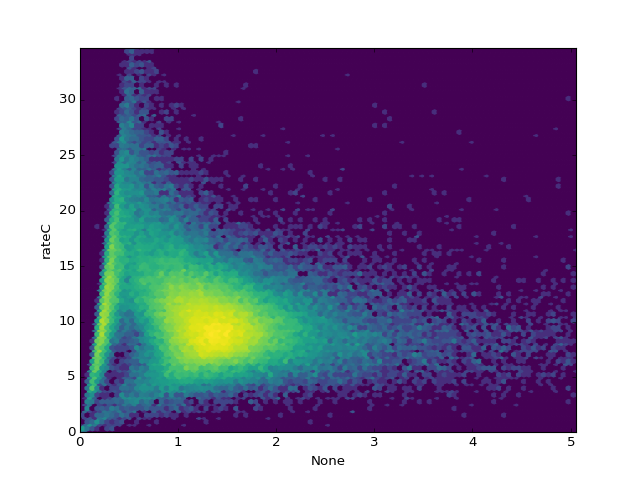

In [145]:
myhexplot(data.rateC / data.rateA, data.rateC, p1=99)

<IPython.core.display.Javascript object>


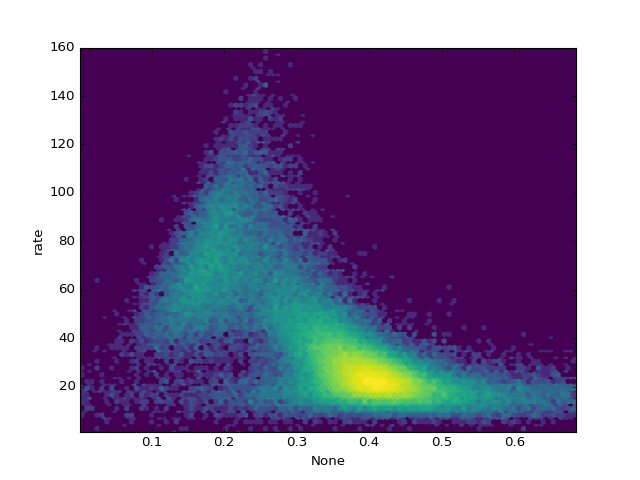

In [151]:
myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99)

<IPython.core.display.Javascript object>


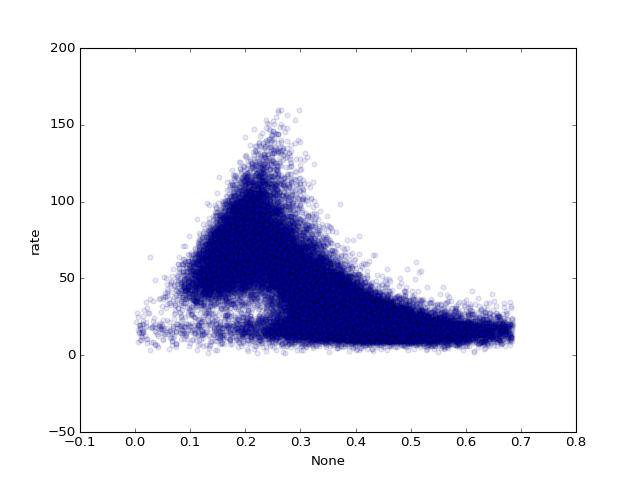

In [156]:
myscatterplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99, alpha=0.1)

<IPython.core.display.Javascript object>


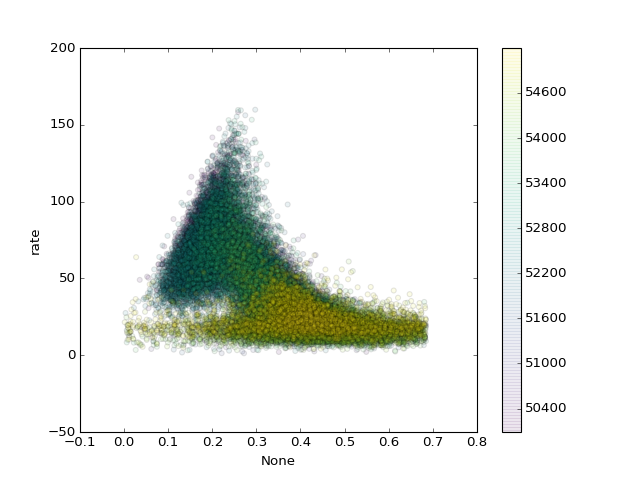

In [158]:
myscatterplot(data.rateC / data.rate, data.rate, color=data.MJD, p1=99, p2=99.99, alpha=0.1)
plt.colorbar()

In [164]:
l.set_data?

<IPython.core.display.Javascript object>


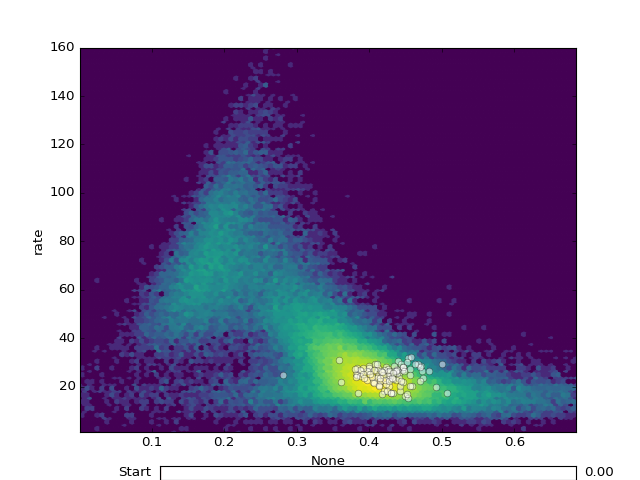

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

myhexplot(data.rateC / data.rate, data.rate, p1=99, p2=99.99)

cola = data.rateC / data.rate
colb = data.rate
cola, colb, color = mask(cola, colb, p1=99, p2=99.99)


delta = 10
window = 100

def setup_plot(cola, colb):
    dots, = plt.plot(cola, colb, 'o', c='w', alpha=.5)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)
    return dots

l = setup_plot(cola[:window], colb[:window])

ax = plt.gca()

chunks = float(len(cola)) / delta

axfreq = plt.axes([0.25, 0.0, 0.65, 0.03])
sfreq = Slider(axfreq, 'Start', 0, chunks, valinit=0)


def update(val):
    start = int(sfreq.val)
    inds = range(start * delta, start * delta + window)
    l.set_data(cola.iloc[inds], colb.iloc[inds])
    plt.gcf().canvas.draw_idle()
    
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()

In [234]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(np.c_[cola, colb])

<IPython.core.display.Javascript object>


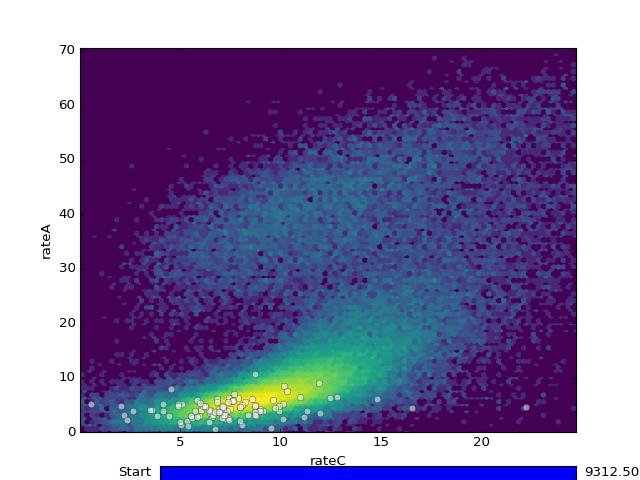

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons


cola = data.rateC
colb = data.rateA
myhexplot(cola, colb, p1=99, p2=99.99)

cola, colb, color = mask(cola, colb, p1=99, p2=99.99)


delta = 10
window = 100

def setup_plot(cola, colb):
    dots, = plt.plot(cola, colb, 'o', c='w', alpha=.5)
    plt.xlabel(cola.name)
    plt.ylabel(colb.name)
    return dots

l = setup_plot(cola[:window], colb[:window])

ax = plt.gca()

chunks = float(len(cola)) / delta

axfreq = plt.axes([0.25, 0.0, 0.65, 0.03])
sfreq = Slider(axfreq, 'Start', 0, chunks, valinit=0)


def update(val):
    start = int(sfreq.val)
    inds = range(start * delta, start * delta + window)
    l.set_data(cola.iloc[inds], colb.iloc[inds])
    plt.gcf().canvas.draw_idle()
    
sfreq.on_changed(update)

ax.set_xlim(cola.min(), cola.max())
ax.set_ylim(colb.min(), colb.max())
plt.show()